# Loan Data From Prosper Marketplace Exploration
## by Maryam Shakeri

## Preliminary Wrangling

## Introduction

[Prosper](https://www.prosper.com/) was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than 17 billion dollars in loans to more than 1,030,000 people.
Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between 2,000 and 40,000 dollars. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loans servicing on behalf of the matched borrowers and investors. Prosper Marketplace is backed by leading investors including Sequoia Capital, Francisco Partners, Institutional Venture Partners, and Credit Suisse NEXT Fund (accessed on 11/11/2020, source: https://www.prosper.com/about)

In [171]:
# Import all packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Gather

In [172]:
# Load data into a dataframe
df_origin=pd.read_csv('prosperLoanData.csv')
df_origin

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [173]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [174]:
# Pick a subset from df_origin to do exploration
df= df_origin[['ListingKey','ListingCreationDate','Term','LoanStatus','BorrowerAPR','ProsperRating (numeric)','ListingCategory (numeric)','EmploymentStatus','CreditScoreRangeLower','InquiriesLast6Months','IncomeRange','StatedMonthlyIncome','MonthlyLoanPayment']]

In [175]:
# Save the subset into a csv file
df.to_csv('prosperLoanData_subset.csv', index=False)

In [176]:
# Load and read the csv file into a data frame
df_sub=pd.read_csv('prosperLoanData_subset.csv')
df_sub.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (numeric),ListingCategory (numeric),EmploymentStatus,CreditScoreRangeLower,InquiriesLast6Months,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,NaN,0,Self-employed,640.0,3.0,"$25,000-49,999",3083.333333,330.43
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,6.0,2,Employed,680.0,3.0,"$50,000-74,999",6125.000000,318.93
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,NaN,0,Not available,480.0,0.0,Not displayed,2083.333333,123.32
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,6.0,16,Employed,800.0,0.0,"$25,000-49,999",2875.000000,321.45
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,3.0,2,Employed,680.0,1.0,"$100,000+",9583.333333,563.97


## Assess

In [177]:
df_sub.sample(20)

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (numeric),ListingCategory (numeric),EmploymentStatus,CreditScoreRangeLower,InquiriesLast6Months,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment
112750,FEB33575224942627B78C3C,2013-04-03 21:05:11.007000000,60,Current,0.13942,6.0,1,Employed,760.0,0.0,"$50,000-74,999",5416.666667,441.76
32986,31D83593617280516B0774C,2013-11-08 16:09:22.607000000,60,Current,0.21935,4.0,1,Employed,720.0,2.0,"$25,000-49,999",3458.333333,262.16
8874,D6AC35495281991968832C0,2012-06-24 10:23:40.150000000,12,Completed,0.06589,7.0,1,Employed,820.0,0.0,"$100,000+",11536.000000,429.53
9697,4B383398871984842F5E541,2007-09-05 15:47:30.437000000,36,Completed,0.21337,NaN,0,Self-employed,660.0,4.0,"$100,000+",14371.000000,936.75
21003,15B8351154980655516DDDE,2011-03-25 08:32:07.977000000,36,Completed,0.13109,5.0,3,Full-time,760.0,1.0,"$100,000+",10478.000000,491.01
6556,9D6435183775021183505F4,2011-06-18 13:12:43.947000000,36,Current,0.35643,2.0,7,Employed,640.0,2.0,"$75,000-99,999",7500.000000,217.74
57954,6A4334192662686291A1D5B,2008-04-22 08:40:56.440000000,36,Completed,0.17018,NaN,1,Full-time,640.0,2.0,"$25,000-49,999",3583.333333,145.29
96473,B69E350070990140075ABDF,2010-11-15 15:03:27.367000000,36,Completed,0.17069,5.0,1,Employed,740.0,0.0,"$25,000-49,999",3333.333333,304.62
315,08BC3599164655446FCB378,2014-01-07 15:33:33.700000000,36,Current,0.12081,6.0,1,Self-employed,700.0,2.0,"$25,000-49,999",3333.333333,95.82
77498,1A6F3600679262047F968EF,2014-01-17 12:52:17.320000000,60,Current,0.17685,5.0,15,Employed,660.0,0.0,"$50,000-74,999",5583.333333,167.82


In [178]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingCreationDate        113937 non-null  object 
 2   Term                       113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   BorrowerAPR                113912 non-null  float64
 5   ProsperRating (numeric)    84853 non-null   float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   EmploymentStatus           111682 non-null  object 
 8   CreditScoreRangeLower      113346 non-null  float64
 9   InquiriesLast6Months       113240 non-null  float64
 10  IncomeRange                113937 non-null  object 
 11  StatedMonthlyIncome        113937 non-null  float64
 12  MonthlyLoanPayment         113937 non-null  float64
dtypes: float64(6), int64(2), obje

In [179]:
# Look at the statistical information of columns
df_sub.describe()

,Term,BorrowerAPR,ProsperRating (numeric),ListingCategory (numeric),CreditScoreRangeLower,InquiriesLast6Months,StatedMonthlyIncome,MonthlyLoanPayment
count,113937.000000,113912.000000,84853.000000,113937.000000,113346.000000,113240.000000,1.139370e+05,113937.000000
mean,40.830248,0.218828,4.072243,2.774209,685.567731,1.435085,5.608026e+03,272.475783
std,10.436212,0.080364,1.673227,3.996797,66.458275,2.437507,7.478497e+03,192.697812
min,12.000000,0.006530,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,36.000000,0.156290,3.000000,1.000000,660.000000,0.000000,3.200333e+03,131.620000
50%,36.000000,0.209760,4.000000,1.000000,680.000000,1.000000,4.666667e+03,217.740000
75%,36.000000,0.283810,5.000000,3.000000,720.000000,2.000000,6.825000e+03,371.580000
max,60.000000,0.512290,7.000000,20.000000,880.000000,105.000000,1.750003e+06,2251.510000


In [180]:
# Look at the number of null values in each column
df_sub.isnull().sum()

ListingKey                       0
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
ProsperRating (numeric)      29084
ListingCategory (numeric)        0
EmploymentStatus              2255
CreditScoreRangeLower          591
InquiriesLast6Months           697
IncomeRange                      0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
dtype: int64

In [181]:
# Find the sum of duplicate values 
sum(df_sub.duplicated())

871

### Quality issues
- Change the data type of the 'ListingCreationDate' column from the object to datetime.
- Change the data type of the 'Term' column to category.
- Drop null values from these columns: 'CreditScoreRangeLower', 'InquiriesLast6Months', 'ProsperRating (numeric)'.
- Change the data type for 'CreditScoreRangeLower', 'InquiriesLast6Months', 'ProsperRating (numeric)' columns from float to integer.
- Extract the year from the 'ListingCreationDate' column and create a new column for better exploration.
- Change the data type of the new column to category.
- Change the data type of the 'ListingCategory (numeric)' column to category.
- Drop duplicates.


## Clean

In [182]:
# First, make a copy of the df_sub.
df_sub= df_sub.copy()

### Define:
  The 'ListingCreationDate' column shows the date the listing was created. Change the data type of the column from object to datetime.

### Code:

In [183]:
df_sub['ListingCreationDate'] = pd.to_datetime(df_sub['ListingCreationDate'])

### Test:


In [184]:
df_sub['ListingCreationDate'].dtype

dtype('<M8[ns]')

In [185]:
# https://forum.onefourthlabs.com/t/regarding-datatype-dtype-m8-ns/7189
# datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype. 
# On a machine whose byte order is little endian, there is no difference between np.dtype('datetime64[ns]') and np.dtype('<M8[ns]')
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')


True

### Define:
 The 'Term' is the length of the loan expressed in months. Change its data type from int to category.

### Code:

In [186]:
df_sub['Term']=df_sub['Term'].astype('category')

### Test:

In [187]:
df_sub['Term'].dtype

CategoricalDtype(categories=[12, 36, 60], ordered=False)

### Define:
Drop null values from these columns: 'CreditScoreRangeLower', 'InquiriesLast6Months', 'ProsperRating (numeric)' ,and then change their data type from float to integer.




### Code:

In [188]:
# To avoid this error:'ValueError: Cannot convert float NAN to integer', first drop null values and then convert float to integer
# https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer
df_sub=df_sub.dropna(subset=['CreditScoreRangeLower','InquiriesLast6Months','ProsperRating (numeric)'])

In [189]:
# https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
cols = ['CreditScoreRangeLower','InquiriesLast6Months','ProsperRating (numeric)']
df_sub[cols] = df_sub[cols].applymap(np.int64)

### Test:

In [190]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingKey                 84853 non-null  object        
 1   ListingCreationDate        84853 non-null  datetime64[ns]
 2   Term                       84853 non-null  category      
 3   LoanStatus                 84853 non-null  object        
 4   BorrowerAPR                84853 non-null  float64       
 5   ProsperRating (numeric)    84853 non-null  int64         
 6   ListingCategory (numeric)  84853 non-null  int64         
 7   EmploymentStatus           84853 non-null  object        
 8   CreditScoreRangeLower      84853 non-null  int64         
 9   InquiriesLast6Months       84853 non-null  int64         
 10  IncomeRange                84853 non-null  object        
 11  StatedMonthlyIncome        84853 non-null  float64       
 12  Mon

### Define:
To explore better, extract the year from the 'ListingCreationDate' column and then create a new column ('year_listingCreation').

### Code:

In [191]:
# https://stackoverflow.com/questions/55776571/how-to-split-a-date-column-into-separate-day-month-year-column-in-pandas
df_sub['Year_listingCreation'] = df_sub['ListingCreationDate'].dt.year

### Test:

In [192]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingKey                 84853 non-null  object        
 1   ListingCreationDate        84853 non-null  datetime64[ns]
 2   Term                       84853 non-null  category      
 3   LoanStatus                 84853 non-null  object        
 4   BorrowerAPR                84853 non-null  float64       
 5   ProsperRating (numeric)    84853 non-null  int64         
 6   ListingCategory (numeric)  84853 non-null  int64         
 7   EmploymentStatus           84853 non-null  object        
 8   CreditScoreRangeLower      84853 non-null  int64         
 9   InquiriesLast6Months       84853 non-null  int64         
 10  IncomeRange                84853 non-null  object        
 11  StatedMonthlyIncome        84853 non-null  float64       
 12  Mon

### Define:
Change data type of the 'year_listingCreation' column to category.

### Code:

In [193]:
df_sub['Year_listingCreation']=df_sub['Year_listingCreation'].astype('category')

### Test:

In [194]:
df_sub['Year_listingCreation'].dtype

CategoricalDtype(categories=[2009, 2010, 2011, 2012, 2013, 2014], ordered=False)

### Define:
The 'ListingCategory (numeric)' column is the category of the listing that the borrower selected when posting their listing. Change data type of this column to category.  

### Code:

In [195]:
df_sub['ListingCategory (numeric)']=df_sub['ListingCategory (numeric)'].astype('category')

### Test:

In [196]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingKey                 84853 non-null  object        
 1   ListingCreationDate        84853 non-null  datetime64[ns]
 2   Term                       84853 non-null  category      
 3   LoanStatus                 84853 non-null  object        
 4   BorrowerAPR                84853 non-null  float64       
 5   ProsperRating (numeric)    84853 non-null  int64         
 6   ListingCategory (numeric)  84853 non-null  category      
 7   EmploymentStatus           84853 non-null  object        
 8   CreditScoreRangeLower      84853 non-null  int64         
 9   InquiriesLast6Months       84853 non-null  int64         
 10  IncomeRange                84853 non-null  object        
 11  StatedMonthlyIncome        84853 non-null  float64       
 12  Mon

### Define:
Drop duplicates

### Code:

In [197]:
df_sub.drop_duplicates(inplace=True)

### Test:

In [198]:
sum(df_sub.duplicated())

0

In [199]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 1 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingKey                 83982 non-null  object        
 1   ListingCreationDate        83982 non-null  datetime64[ns]
 2   Term                       83982 non-null  category      
 3   LoanStatus                 83982 non-null  object        
 4   BorrowerAPR                83982 non-null  float64       
 5   ProsperRating (numeric)    83982 non-null  int64         
 6   ListingCategory (numeric)  83982 non-null  category      
 7   EmploymentStatus           83982 non-null  object        
 8   CreditScoreRangeLower      83982 non-null  int64         
 9   InquiriesLast6Months       83982 non-null  int64         
 10  IncomeRange                83982 non-null  object        
 11  StatedMonthlyIncome        83982 non-null  float64       
 12  Mon

In [200]:
# Save the clean dataset into a csv file
df_sub.to_csv('prosperLoanData_subset_clean.csv', index=False)

In [201]:
# Load and read the csv file into a data frame
df_sub_clean=pd.read_csv('prosperLoanData_subset_clean.csv')
df_sub_clean.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (numeric),ListingCategory (numeric),EmploymentStatus,CreditScoreRangeLower,InquiriesLast6Months,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,Year_listingCreation
0,10273602499503308B223C1,2014-02-27 08:28:07.900,36,Current,0.12016,6,2,Employed,680,3,"$50,000-74,999",6125.000000,318.93,2014
1,0EF5356002482715299901A,2012-10-22 11:02:35.010,36,Current,0.12528,6,16,Employed,800,0,"$25,000-49,999",2875.000000,321.45,2012
2,0F023589499656230C5E3E2,2013-09-14 18:38:39.097,36,Current,0.24614,3,2,Employed,680,1,"$100,000+",9583.333333,563.97,2013
3,0F05359734824199381F61D,2013-12-14 08:26:37.093,60,Current,0.15425,5,1,Employed,740,0,"$100,000+",8333.333333,342.37,2013
4,0F0A3576754255009D63151,2013-04-12 09:52:56.147,36,Current,0.31032,2,1,Employed,680,0,"$25,000-49,999",2083.333333,122.67,2013


In [202]:
df_sub_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83982 entries, 0 to 83981
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingKey                 83982 non-null  object 
 1   ListingCreationDate        83982 non-null  object 
 2   Term                       83982 non-null  int64  
 3   LoanStatus                 83982 non-null  object 
 4   BorrowerAPR                83982 non-null  float64
 5   ProsperRating (numeric)    83982 non-null  int64  
 6   ListingCategory (numeric)  83982 non-null  int64  
 7   EmploymentStatus           83982 non-null  object 
 8   CreditScoreRangeLower      83982 non-null  int64  
 9   InquiriesLast6Months       83982 non-null  int64  
 10  IncomeRange                83982 non-null  object 
 11  StatedMonthlyIncome        83982 non-null  float64
 12  MonthlyLoanPayment         83982 non-null  float64
 13  Year_listingCreation       83982 non-null  int

### What is the structure of your dataset?

- The original dataset (df_origin) includes *81* [columns](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) and *113937* rows that contain  information about borrowers and their loans. A small subset has been picked from df_origin to do some exploration on it. The subset (df_sub_clean) has *14* columns, and *83982* rows.

The columns include:

    1) ListingKey: Unique key for each listing.

    2) ListingCreationDate: The date the listing was created.

    3) Term: The length of the loan expressed in months.

    4) LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.

    5) BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.

    6) ProsperRating (numeric): The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.

    7) ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

    8) EmploymentStatus: The employment status of the borrower at the time they posted the listing.

    9) CreditScoreRangeLower: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

    10) InquiriesLast6Months: Number of inquiries in the past six months at the time the credit profile was pulled.

    11) IncomeRange: The income range of the borrower at the time the listing was created.

    12) StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

    13) MonthlyLoanPayment: The scheduled monthly loan payment.
    
    14) A new column was created for better exploration. It (Year_listingCreation) includes the years of the 'ListingCreationDate' column. 


### What is/are the main feature(s) of interest in your dataset?

I would like to investigate loan status and employment status and want to know how other factors affect them.


### What features in the dataset do you think will help support your investigation into your features of interest?

I think 'BorrowerAPR', 'ProsperRating (numeric)', 'CreditScoreRangeLower', 'InquiriesLast6Months', and 'IncomeRange' are essential factors that have a crucial role in loan status and employment status and help to understand them better and to know how much chances we have to get a loan.



## Univariate Exploration



In [203]:
# Get a Series containing counts of unique values of loanstatus
df_sub_clean['LoanStatus'].value_counts()

Current                   55730
Completed                 19651
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

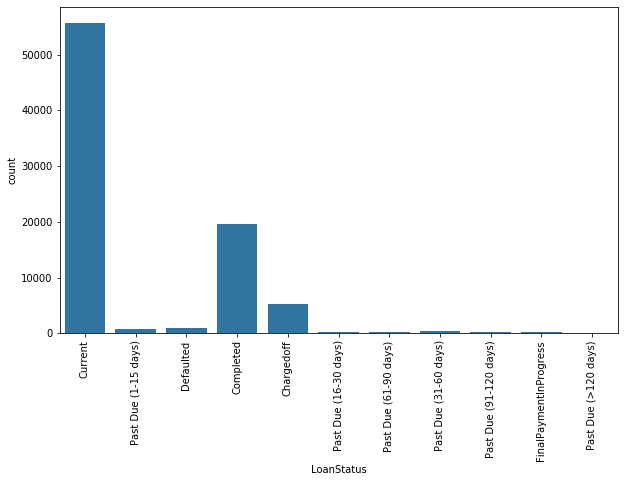

In [204]:
# Using countplot(a bar graph for categorical area), to shows the number of occurrences of  a certain type of LoanStatus.
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
plt.xticks(rotation=90);
sb.countplot(data = df_sub_clean, x = 'LoanStatus', color = base_color);

The bar chart of the 'LoanStatus' column shows that most loan status is *Current*. After that, *Completed* and *Chargedoff* are the most identified loan statuses. A few of them are *Defaulted*. 

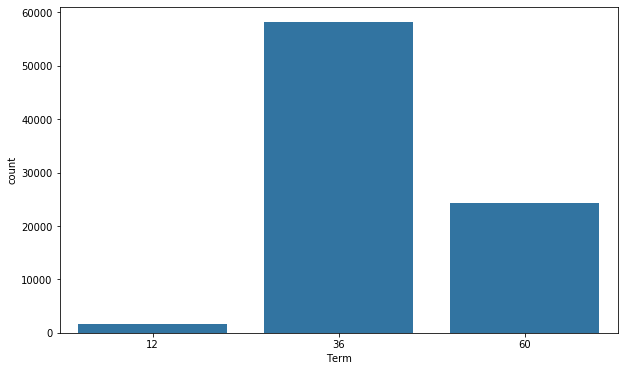

In [205]:
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
sb.countplot(data = df_sub_clean, x = 'Term', color = base_color);

The *Term* bar chart shows that most loan terms are *36*, *60*, and *12* months, respectively.

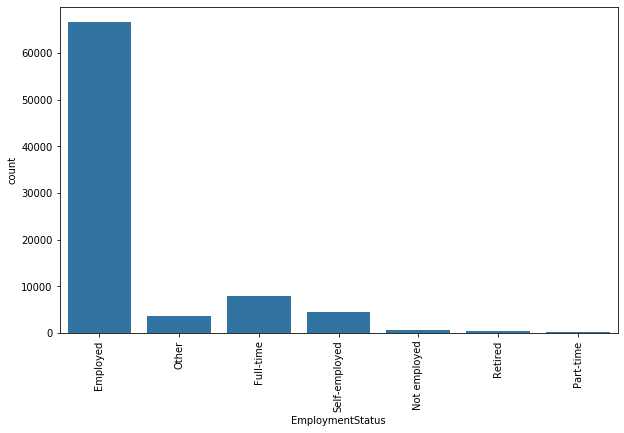

In [206]:
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
plt.xticks(rotation=90);
sb.countplot(data = df_sub_clean, x = 'EmploymentStatus', color = base_color);

Most people who registered for the loan were *Employed*, *Full-time*, *Self-employed*, and *Other*, respectively.

In [207]:
df_sub_clean['ListingCategory (numeric)'].value_counts()

1     52496
7      9172
2      6756
3      5266
6      2233
13     1987
15     1507
18      882
14      863
19      764
20      762
16      304
5       274
11      214
8       196
10       91
9        85
12       58
17       52
0        20
Name: ListingCategory (numeric), dtype: int64

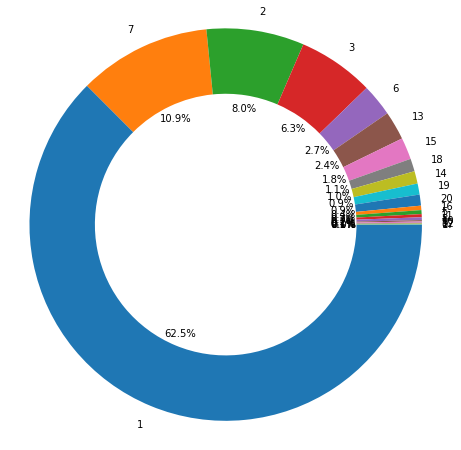

In [208]:
# Use the result of value_counts() function for 'ListingCategory (numeric)' and put it in the plt.pie function. It shows the percent of unique values in descending order.
Category = df_sub_clean['ListingCategory (numeric)'].value_counts()
plt.figure(figsize=[15,8])
# Add a wedgeprops argument to the pie function to create a donut plot 
plt.pie(Category, labels = Category.index, radius=1.2, autopct='%1.1f%%',
        counterclock = False, wedgeprops = {'width' : 0.4});
# Has the used option 'Square'
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axisplt.axis('square')
plt.axis('square');

Most categories which were selected during listing were for *Debt Consolidation* (62.5%), *Other* (10.9%), *Home Improvement* (8.0%) and *Business* (6.3%), respectively.  

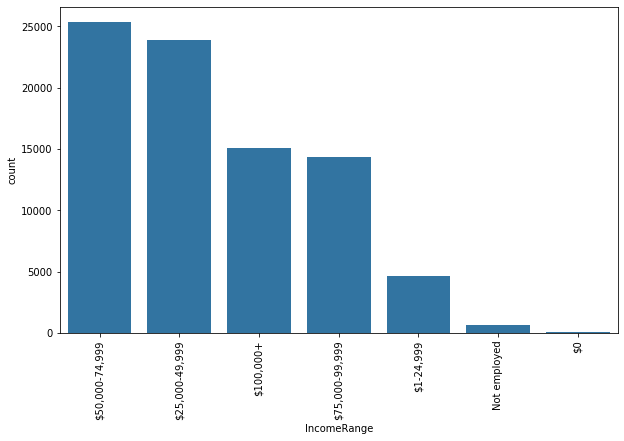

In [209]:
plt.figure(figsize=[10,6])
base_color = sb.color_palette()[0]
plt.xticks(rotation=90);
sb.countplot(data = df_sub_clean, x = 'IncomeRange', color = base_color);

Most people who registered for loan had 'IncomeRange' of *50,000-74,999* and *25,000-49,999* dollars, respectively.

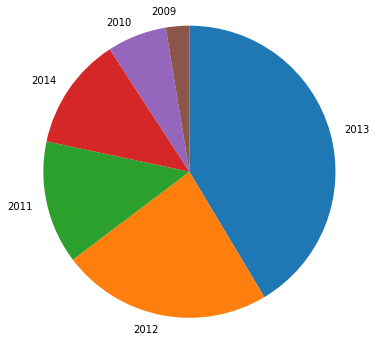

In [210]:
plt.figure(figsize=[10,6])
year = df_sub_clean['Year_listingCreation'].value_counts()
plt.pie(year, labels = year.index, startangle = 90,
        counterclock = False);
plt.axis('square');

A vast majority of loans were listed in *2013*.

In [211]:
# Look at the statistical information of the 'BorrowerAPR' column
df_sub_clean['BorrowerAPR'].describe()

count    83982.000000
mean         0.226945
std          0.080047
min          0.045830
25%          0.163610
50%          0.219450
75%          0.292540
max          0.423950
Name: BorrowerAPR, dtype: float64

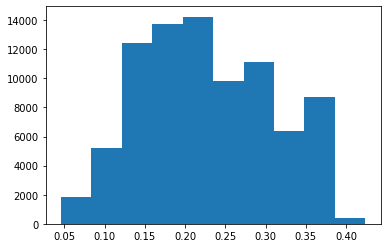

In [212]:
# A histogram is used to plot the distribution of a numeric variable 'BorrowerAPR'
plt.hist(data = df_sub_clean, x = 'BorrowerAPR');

We almost see a normal distribution for the 'BorrowerAPR' data.

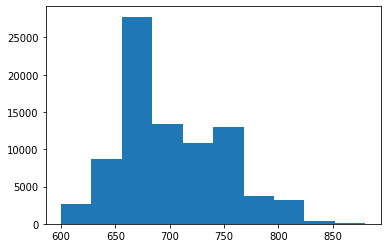

In [213]:
# A histogram is used to plot the distribution of a numeric variable 'CreditScoreRangeLower'
plt.hist(data = df_sub_clean, x = 'CreditScoreRangeLower');

The histogram of the 'CreditScoreRangeLower' data looks like a right-skewed histogram. Let's look at the statistics of this column and then add bins to see a better graph.


In [214]:
df_sub_clean['CreditScoreRangeLower'].describe()

count    83982.000000
mean       699.476316
std         47.185610
min        600.000000
25%        660.000000
50%        700.000000
75%        720.000000
max        880.000000
Name: CreditScoreRangeLower, dtype: float64

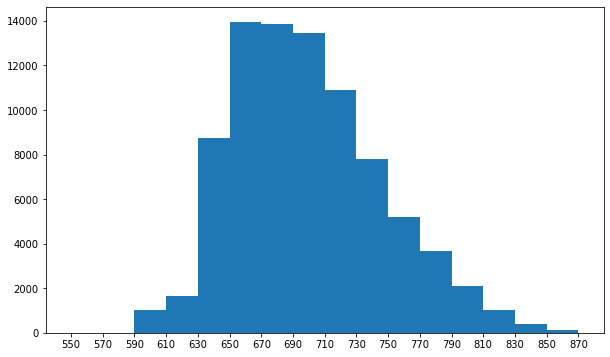

In [215]:
# Look at the histogram of 'CreditScoreRangeLower' by adding bins
plt.figure(figsize=[10,6])
bin_edges = np.arange(550,880,20)
plt.hist(data = df_sub_clean, x = 'CreditScoreRangeLower', bins=bin_edges);
xticks=np.arange(550,880,20);
plt.xticks(xticks);

Further analysis confirmed that it is a right-skewed distribution.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The results of the univariate graphs show that:

- A vast majority of loans were listed in *2013*.
- Most people who registered for the loan were *Employed*, *Full-time*, *Self-employed* and *Other*, respectively with an income range of 50,000-74,999 and 25,000-49,999 dollars.
- The vast majority of loan statuses are *Current*, *Completed*, and *Chargedoff*, respectively, and a few are *Defaulted*.
- Most loan terms are *36*, *60*, and *12* months.
- *62.5%* of those people applied loan for *Debt Consolidation*, *10.9%* for *other*, *8.0%* for *Home Improvement*  and *6.3%* for *Business*.
- There is a normal distribution for the 'BorrowerAPR' data.
- The 'CreditScoreRangeLower' data represent a right-skewed distribution.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Only The 'CreditScoreRangeLower' data had a right-skewed distribution, so we used its statistics information and added *bin_edges* and *xticks* to see a better graph. 

## Bivariate Exploration




First, let's look at the result of the correlation of data and see which ones have a relationship.

In [216]:
df_sub_clean.corr()

,Term,BorrowerAPR,ProsperRating (numeric),ListingCategory (numeric),CreditScoreRangeLower,InquiriesLast6Months,StatedMonthlyIncome,MonthlyLoanPayment,Year_listingCreation
Term,1.000000,-0.068346,0.080679,-0.063192,0.050601,-0.050064,0.009313,0.055873,0.245753
BorrowerAPR,-0.068346,1.000000,-0.962202,0.108306,-0.526688,0.260735,-0.093773,-0.321105,-0.237585
ProsperRating (numeric),0.080679,-0.962202,1.000000,-0.094242,0.549401,-0.264842,0.094116,0.329405,0.166948
ListingCategory (numeric),-0.063192,0.108306,-0.094242,1.000000,-0.008525,0.053687,-0.016048,-0.188030,-0.069026
CreditScoreRangeLower,0.050601,-0.526688,0.549401,-0.008525,1.000000,-0.081187,0.067770,0.215155,-0.053021
InquiriesLast6Months,-0.050064,0.260735,-0.264842,0.053687,-0.081187,1.000000,0.052688,-0.052432,-0.074477
StatedMonthlyIncome,0.009313,-0.093773,0.094116,-0.016048,0.067770,0.052688,1.000000,0.182273,0.038310
MonthlyLoanPayment,0.055873,-0.321105,0.329405,-0.188030,0.215155,-0.052432,0.182273,1.000000,0.286600
Year_listingCreation,0.245753,-0.237585,0.166948,-0.069026,-0.053021,-0.074477,0.038310,0.286600,1.000000


As seen, 'BorrowerAPR' has a very strong negative correlation with 'ProsperRating (numeric)', a moderate negative correlation with 'CreditScoreRangeLower', a weak negative correlation with 'MonthlyLoanPayment' and a weak positive correlation with 'InquiriesLast6Months'.

'ProsperRating (numeric)' has a moderate positive correlation with 'CreditScoreRangeLower', a weak positive correlation with 'MonthlyLoanPayment' and a weak negative correlation with 'InquiriesLast6Months'.    

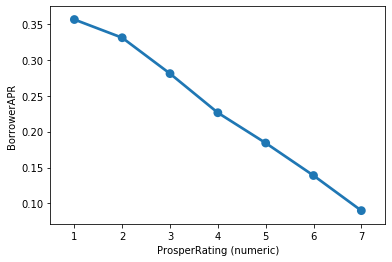

In [217]:
# Using point plot method from seaborn to see the relationship between two numeric variables 'ProsperRating (numeric)' and 'BorrowerAPR'
sb.pointplot(data = df_sub_clean, x = 'ProsperRating (numeric)', y = 'BorrowerAPR');

The graph displays a linear relationship between 'BorrowerAPR' and 'ProsperRating (numeric)' with a negative slope. It means with a higher prosper rating, the amount of borrower APR reduces. 

In [218]:
#  looking at statistical information of 'ProsperRating (numeric)' and 'CreditScoreRangeLower' to add bins in their graph
df_sub_clean[['ProsperRating (numeric)','CreditScoreRangeLower']].describe()

,ProsperRating (numeric),CreditScoreRangeLower
count,83982.000000,83982.000000
mean,4.068705,699.476316
std,1.675442,47.185610
min,1.000000,600.000000
25%,3.000000,660.000000
50%,4.000000,700.000000
75%,5.000000,720.000000
max,7.000000,880.000000


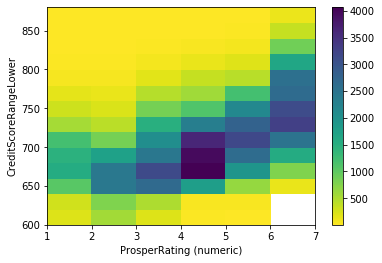

In [219]:
# use heatmap (a 2-d version of the histogram that can be used as an alternative to a scatterplot) from matplotlib to see the relationship bwtween two numeric variable 'ProsperRating (numeric)' and 'CreditScoreRangeLower' 
# using min and max of variables to add bines
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map 
bins_x=np.arange(1,7+1,1)
bins_y=np.arange(600,880+20,20)
plt.hist2d(data=df_sub_clean, x = 'ProsperRating (numeric)', y = 'CreditScoreRangeLower', cmin=0.5, cmap='viridis_r', bins=[bins_x,bins_y]);
plt.xlabel('ProsperRating (numeric)')
plt.ylabel('CreditScoreRangeLower')
plt.colorbar();

There is almost a linear relationship with a positive slope between 'ProsperRating (numeric)' and 'CreditScoreRangeLower' data.  A higher credit score corresponds to a higher prosper rating.  

In [220]:
df_sub_clean[['BorrowerAPR','InquiriesLast6Months']].describe()

,BorrowerAPR,InquiriesLast6Months
count,83982.000000,83982.000000
mean,0.226945,0.964385
std,0.080047,1.400994
min,0.045830,0.000000
25%,0.163610,0.000000
50%,0.219450,0.000000
75%,0.292540,1.000000
max,0.423950,27.000000


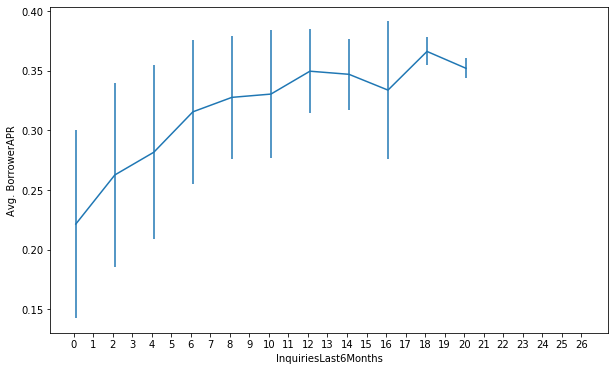

In [221]:
# use error bar from matplotlib to see the relationship between two numeric variable 'BorrowerAPR' and 'InquiriesLast6Months'
plt.figure(figsize=[10,6])
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bins_inq=np.arange(0,27+2,2)
bins_b=bins_inq[:-1]+0.1
# Cut the bin values into discrete intervals. Returns a Series object
inq_binned=pd.cut(df_sub_clean['InquiriesLast6Months'], bins_inq, include_lowest=True)
# For the points in each bin, we compute the mean and standard error of the mean
APR_mean=df_sub_clean['BorrowerAPR'].groupby(inq_binned).mean()
APR_std=df_sub_clean['BorrowerAPR'].groupby(inq_binned).std()
plt.errorbar(x=bins_b, y=APR_mean, yerr=APR_std)
plt.xlabel('InquiriesLast6Months')
plt.ylabel('Avg. BorrowerAPR')
xticks=np.arange(0,27,1)
plt.xticks(xticks);

The line plot shows a linear relationship with a positive slope between 'BorrowerAPR' and 'InquiriesLast6Months'. It means, with more inquiries, the amount of borrower APR increases.  

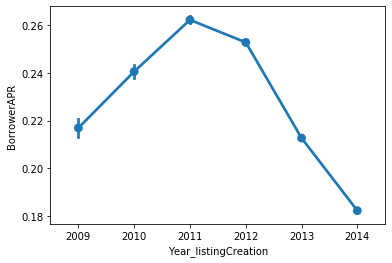

In [222]:
sb.pointplot(data=df_sub_clean, x='Year_listingCreation',y='BorrowerAPR');

The highest APRs (the annual cost of a loan to a borrower) were in *2011*, and the lowest were in *2014*. 

In [223]:
# Create a subset dataframe (df_status) that includes only "Completed", "Current", "Defaulted" and "Chargedoff" LoanStatus to do exploration
df_status=df_sub_clean.query('LoanStatus=="Completed" or LoanStatus=="Defaulted" or LoanStatus=="Chargedoff" or LoanStatus=="Current"')


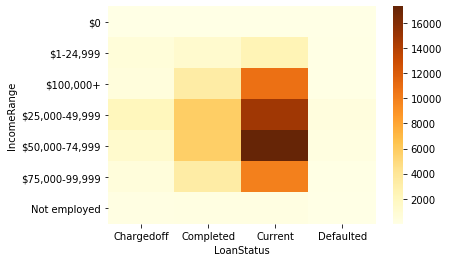

In [224]:
# Using heatmap method from seaborn to see the relationship between two categorical variable 'IncomeRange' and 'LoanStatus'
# Use group_by() and size() to get the number of LoanStatus and each combination of the two variable levels as a pandas Series and then use .reset_index() to convert a series into a dataframe object
counts = df_status.groupby(['IncomeRange', 'LoanStatus'])['ListingKey'].size().reset_index()
# Use DataFrame.pivot() to rearrange the data, to have IncomeRange on rows
counts = counts.pivot('IncomeRange', 'LoanStatus', 'ListingKey')
sb.heatmap(counts, cmap="YlOrBr");

Income range for *Chargedoff* statue was 25,000-49,999 dollars. For  most *Completed* status, it was in the ranges of 25,000-49,999 and 50,000-74,999 dollars, and for most *Current* status, it was in the ranges of 50,000-74,999 and 25,000-49,999 dollars. 

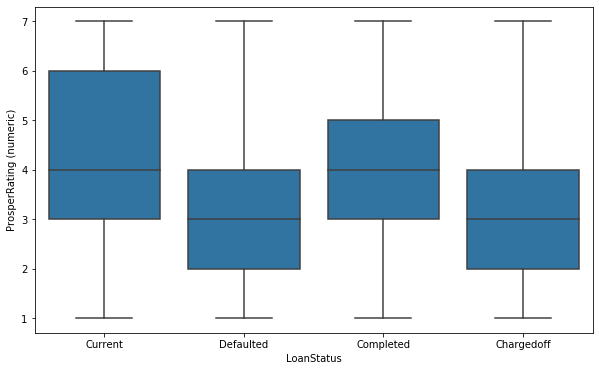

In [225]:
# Use boxplot method from seaborn to see the relationship between a numeric ('ProsperRating (numeric)') and categorical ('LoanStatus') variables
plt.figure(figsize = [10,6])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_status, x = 'LoanStatus', y = 'ProsperRating (numeric)', color = base_color);

The boxplot shows that the *Defaulted*, *Completed*, and *Chargedoff* have the same interquartile range (IQR, IQR = Q3 – Q1), while the Current has a bigger IQR. It shows that the data of the Current were more spread out.  

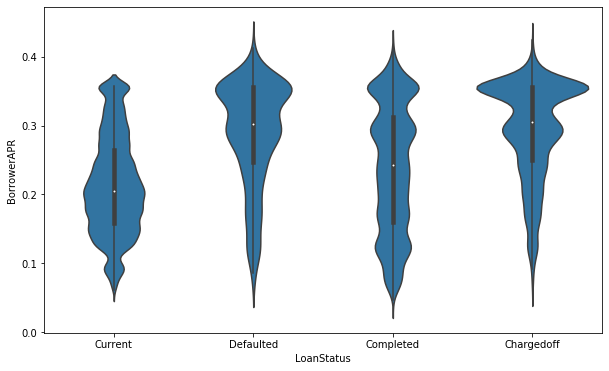

In [226]:
# Use violinplot method from seaborn to see the relationship between a numeric ('BorrowerAPR') and categorical ('LoanStatus') variables
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[0]
sb.violinplot(data = df_status, x = 'LoanStatus', y = 'BorrowerAPR', color = base_color);

The higher APRs are for the *Chargedoff* and *Defaulted*, and the lowest ones are for the *Current*.

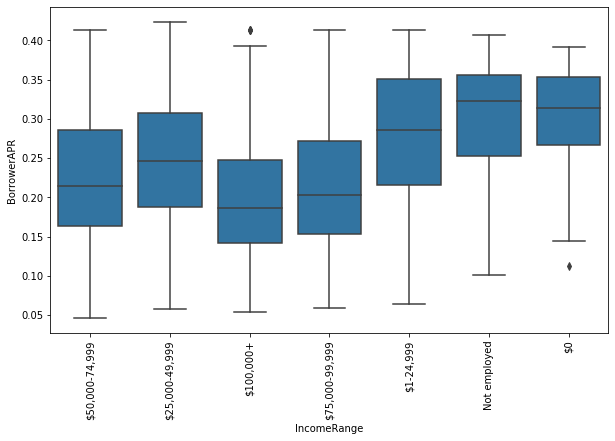

In [227]:
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = df_sub_clean, x = 'IncomeRange', y = 'BorrowerAPR', color = base_color);
plt.xticks(rotation=90);

The lowest APRs were for IncomeRange of higher than 100,000 dollars and then 75,000-99,999 dollars.

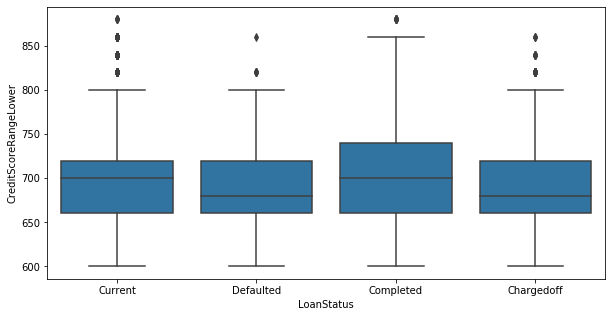

In [228]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
ax1 = sb.boxplot(data = df_status, x = 'LoanStatus', y = 'CreditScoreRangeLower', color = base_color);

The highest *CreditScoreRangeLower* was for the *Current* and *Completed* status. Also, the *Completed* status is more spread out.

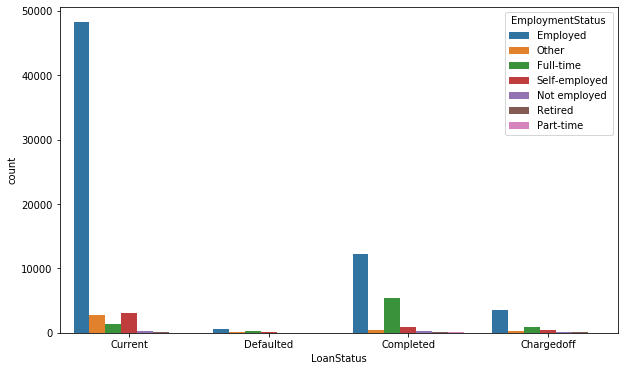

In [229]:
# Use countplot method from seaborn to see the relationship between two categorical variables 'LoanStatus' and 'EmploymentStatus'
plt.figure(figsize=[10,6])
sb.countplot(data = df_status, x = 'LoanStatus', hue = 'EmploymentStatus');

As the graph shows, most *EmploymentStatus* is *employed* for all loan status. After that, for the *current*,  most of them are *self-employed* and *other*, and for the *completed*, most of them are *full-time*.   

<Figure size 720x432 with 0 Axes>

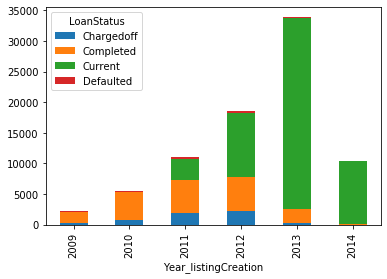

In [230]:
# https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue/50319805
plt.figure(figsize=[10,6])
df_loan_year = df_status.groupby(['LoanStatus', 'Year_listingCreation']).size().reset_index().pivot(columns='LoanStatus', index='Year_listingCreation', values=0)
df_loan_year.plot(kind='bar', stacked=True);

From 2009 to 2011, most loan status was *completed*. For 2012, 2013, and 2014 was *current*. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- There is a linear relationship between 'BorrowerAPR' and 'ProsperRating (numeric)' with a negative slope. It means with a higher prosper rating, the amount of borrower APR reduces.
- There is almost a linear relationship with a positive slope between 'ProsperRating (numeric)' and 'CreditScoreRangeLower' data. A higher credit score relates to a higher prosper rating.
- There is also a linear relationship with a positive slope between 'BorrowerAPR' and 'InquiriesLast6Months'. It means, with more inquiries, the amount of borrower APR increases.
- APRs (the annual cost of a loan to a borrower) were high in 2011, and low in 2014.
- Income range for *Chargedoff* statue was 25,000-49,999 dollars. For most *Completed* status, it was 25,000-49,999 and 50,000-74,999 dollars, and for most *Current* status, it was 50,000-74,999 and 25,000-49,999 dollars.
- The *Defaulted*, *Completed*, and *Chargedoff* have the same interquartile range (IQR, IQR = Q3 – Q1), while the *Current* has a bigger IQR. It shows that the data of the *Current* are more spread out.
- The higher APRs are for the *Chargedoff* and *Defaulted*, and the lowest ones are for the *Current* loans.
- The lowest APRs were for IncomeRange of higher than 100,000 dollars and then 75,000-99,999 dollars.
- The highest *CreditScoreRangeLower* was for the *Current* and *Completed* loans while the *Completed* is more spread out.
- Most *EmploymentStatus* for all four different loan statuses (Current, Completed, Defaulted and Chargedoff) is *Employed*. After that, the *current*, *self-employed* and *other* are the most *EmploymentStatus*, and *full-time* is the most for the *completed*.
- From 2009 to 2011, most loan status was *completed*. For 2012, 2013, and 2014, it was *current*.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Yes. I noticed some linear relationships between some variables.
- 'BorrowerAPR' and 'ProsperRating (numeric)' with a negative slope.
- 'ProsperRating (numeric)' and 'CreditScoreRangeLower' with a positive slope.
- 'BorrowerAPR' and 'InquiriesLast6Months' with a positive slope.

Also,'ProsperRating (numeric)' and 'CreditScoreRangeLower' have a low positive corrolation with 'MonthlyLoanPayment'. 

## Multivariate Exploration

#### The changes in the average of borrower APR for different loan status across the years:

C:\maryam\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\maryam\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


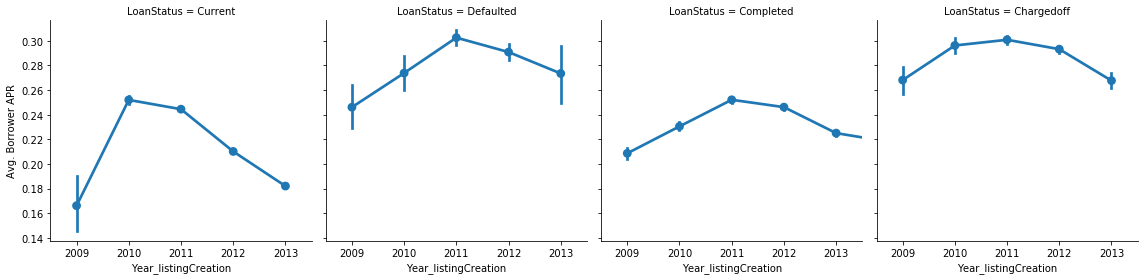

In [231]:
# Use seaborn FacetGrid to facet bivariate plots (Year_listingCreation versus BorrowerAPR ) by the level of LoanStatus
g = sb.FacetGrid(data = df_status, col = 'LoanStatus', size=4)
g.map(sb.pointplot, 'Year_listingCreation', 'BorrowerAPR');
g.set_axis_labels("Year_listingCreation", "Avg. Borrower APR");

The graphs show the average of borrower APRs from 2009 through 2014 for different loan status. The highest APRs belong to *Chargedoff*  across the years. The lowest APR for *Current* was in *2010*, and for the rest of them, it was in *2009*. The highest APRs appeared in *2011* for all statuses. After 2011, the amount of APR  had reduced for all. Before 2010, there is no *Current* status.

#### The changes in the average of borrower APR for different employment status across the years:

C:\maryam\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\maryam\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


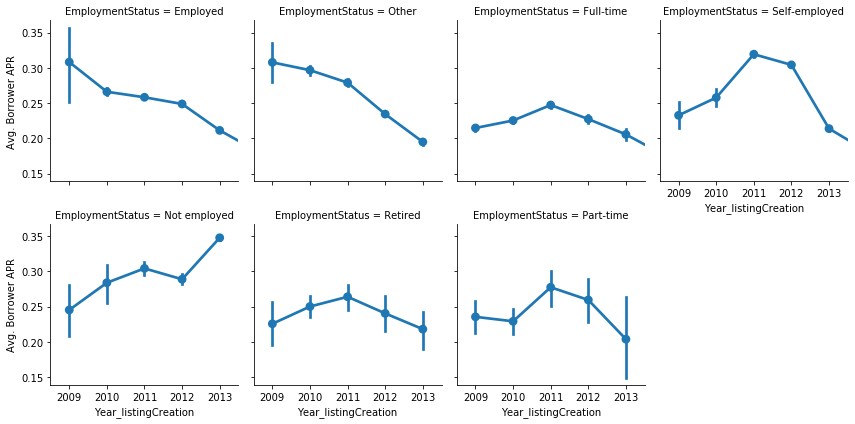

In [232]:
# Use seaborn FacetGrid to facet bivariate plots (Year_listingCreation versus BorrowerAPR ) by the level of EmploymentStatus 
g = sb.FacetGrid(data = df_sub_clean, col = 'EmploymentStatus',col_wrap=4, size=3)
g.map(sb.pointplot, 'Year_listingCreation', 'BorrowerAPR');
g.set_axis_labels("Year_listingCreation", "Avg. Borrower APR");

*Full-time* and *Retired* people had the lowest APR during the years. APR had been reducing from 2009 through 2014 for *Employed* and *Other* people and increasing for *Not employed* ones. The highest APR was in 2013 for *Not employed*. There is no *Other* before 2010. 

#### Looking at the loan types selected by different loan status in loan terms:

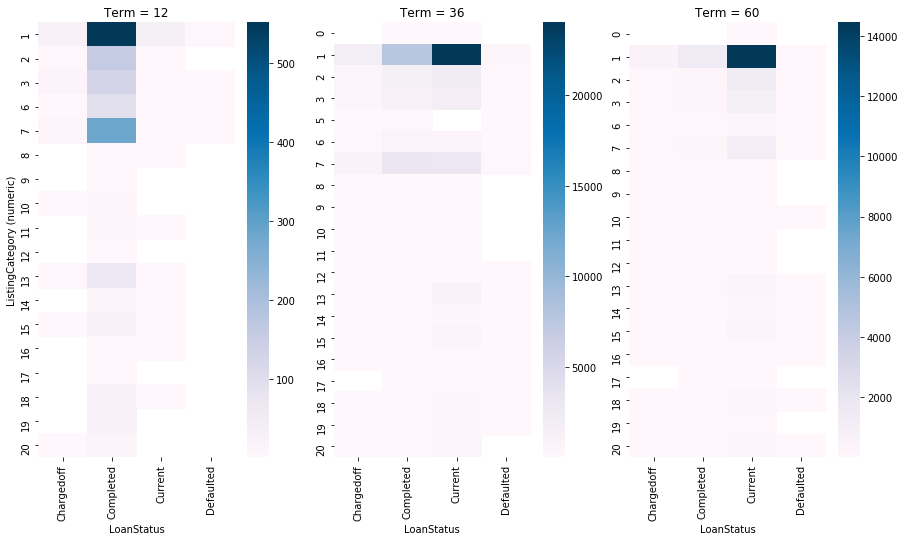

In [233]:
plt.figure(figsize=(15,8))

# First plot(on left)
plt.subplot(1, 3, 1)
# For Term = 12, use group_by() and size() to get the number of LoanStatus and each combination of the two variable levels as a pandas Series and then use .reset_index() to convert a series into a dataframe object
df_1=df_status.query('Term==12').groupby(['ListingCategory (numeric)', 'LoanStatus'])['ListingKey'].size().reset_index()
# Use DataFrame.pivot() to rearrange the data, to have ListingCategory (numeric), on rows
df_1 = df_1.pivot('ListingCategory (numeric)', 'LoanStatus', 'ListingKey')
sb.heatmap(df_1, cmap="PuBu");
plt.title("Term = 12", y=1.015)
plt.xlabel('LoanStatus')
plt.ylabel( 'ListingCategory (numeric)');

# Second plot
plt.subplot(1, 3, 2)
df_1=df_status.query('Term==36').groupby(['ListingCategory (numeric)', 'LoanStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('ListingCategory (numeric)', 'LoanStatus', 'ListingKey')
sb.heatmap(df_1, cmap="PuBu");
plt.title("Term = 36", y=1.015)
plt.xlabel('LoanStatus')
plt.ylabel( '');

# Third plot
plt.subplot(1, 3, 3)
df_1=df_status.query('Term==60').groupby(['ListingCategory (numeric)', 'LoanStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('ListingCategory (numeric)', 'LoanStatus', 'ListingKey')
sb.heatmap(df_1, cmap="PuBu");
plt.title("Term = 60", y=1.015)
plt.xlabel('LoanStatus')
plt.ylabel( '');

For 12-month-term loans, most are *completed* loans that vast majority of them were for *Debt Consolidation(1)*, then for *Other(7)*,*Home Improvement(2)*, *Business(3)*, *Auto(6)* and *Household Expenses(13)*, respectively.

For 36-month-term loans, most of them are *current* loans and then *completed* loans for *Debt Consolidation* and *other*.

For 60-month-term loans, most of them are *current* loans for *Debt Consolidation*.

#### Looking at the loan types selected by different employment status in loan terms:

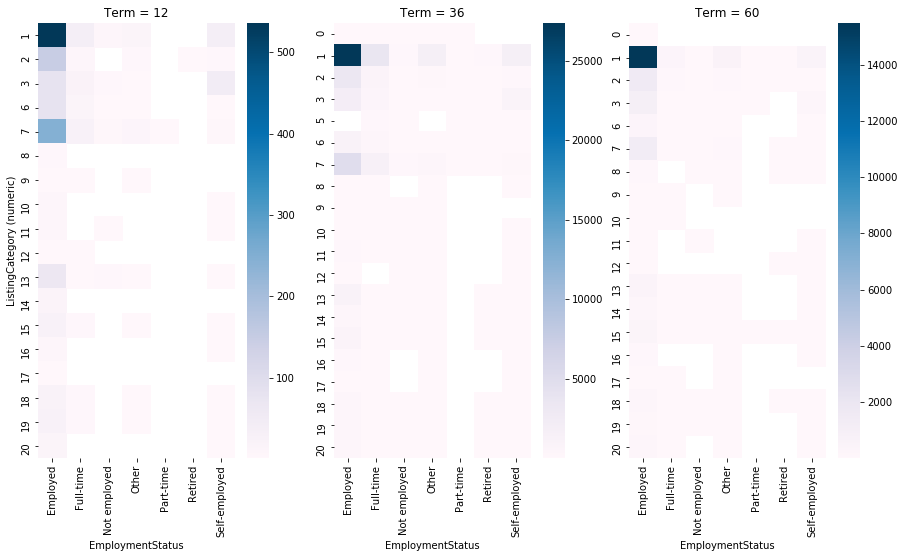

In [234]:
plt.figure(figsize=(15,8))

# First plot(on left)
plt.subplot(1, 3, 1)
df_1=df_sub_clean.query('Term==12').groupby(['ListingCategory (numeric)', 'EmploymentStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('ListingCategory (numeric)', 'EmploymentStatus', 'ListingKey')
sb.heatmap(df_1, cmap="PuBu");
plt.title("Term = 12", y=1.015)
plt.xlabel('EmploymentStatus')
plt.ylabel( 'ListingCategory (numeric)');

# Second plot
plt.subplot(1, 3, 2)
df_1=df_sub_clean.query('Term==36').groupby(['ListingCategory (numeric)', 'EmploymentStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('ListingCategory (numeric)', 'EmploymentStatus', 'ListingKey')
sb.heatmap(df_1, cmap="PuBu");
plt.title("Term = 36", y=1.015)
plt.xlabel('EmploymentStatus')
plt.ylabel( '');

# Third plot
plt.subplot(1, 3, 3)
df_1=df_sub_clean.query('Term==60').groupby(['ListingCategory (numeric)', 'EmploymentStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('ListingCategory (numeric)', 'EmploymentStatus', 'ListingKey')
sb.heatmap(df_1, cmap="PuBu");
plt.title("Term = 60", y=1.015)
plt.xlabel('EmploymentStatus')
plt.ylabel( '');

Most *employed* people applied for loans, and most of these loans (12 months, 36 months, and 60 months) were for *Debt Consolidation*.

In 12-month-term loans, some *self-employed* people applied for *Debt Consolidation* and *Business* loans.

Generally, demand for  *Debt Consolidation*, then for *Other*, *Home Improvement*, *Business*, *Auto*, and *Household Expenses* loans with a 12-month-term was the most comparable to the other loan terms.  

#### BorrowerAPR versus InquiriesLast6Months for Completed and Defaulted loans:

C:\maryam\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


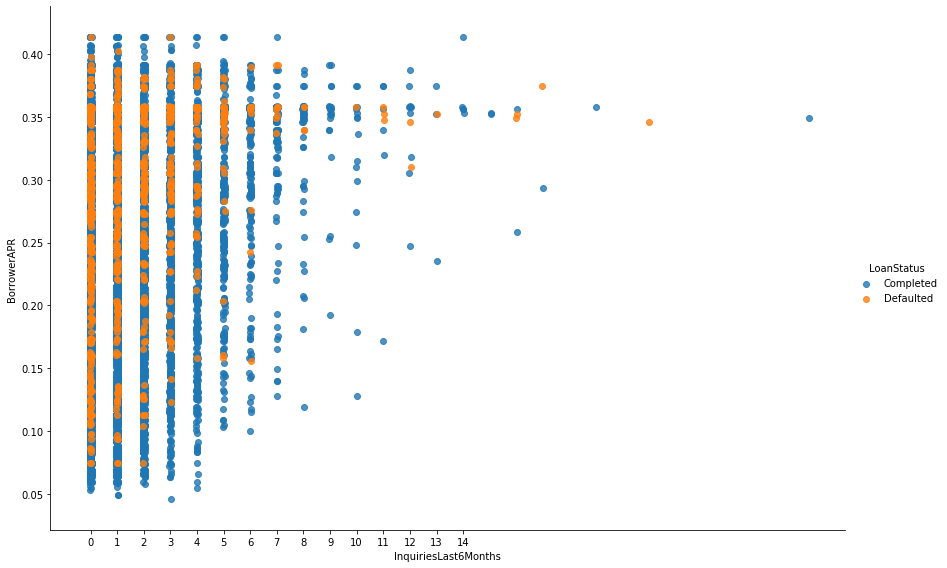

In [235]:
# Use seaborn FacetGrid to facet bivariate plots (InquiriesLast6Months versus BorrowerAPR ) by the level of LoanStatus (Completed,Defaulted) 
# Pick a dataframe that only include 'Completed' and 'Dedaulted' LoanStatus
df_stu=df_sub_clean.query('LoanStatus=="Completed" or LoanStatus=="Defaulted"')
g=sb.FacetGrid(data=df_stu,hue='LoanStatus', hue_order=['Completed','Defaulted'], size=8, aspect=1.5)
g=g.map(sb.regplot, 'InquiriesLast6Months', 'BorrowerAPR', x_jitter=0.04, fit_reg=False );
g.add_legend();
# look at "df_stu['InquiriesLast6Months'].describe" method to see the statistical information of 'InquiriesLast6Months', and then use it to set the xticks  
xticks=np.arange(0,15,1)
plt.xticks(xticks);

*Defaulted* loans have fewer inquiries with higher APRs compared to the *Completed* loans. The *Completed* loans are more spread out.

#### BorrowerAPR versus InquiriesLast6Months for Employed and Not employed people:

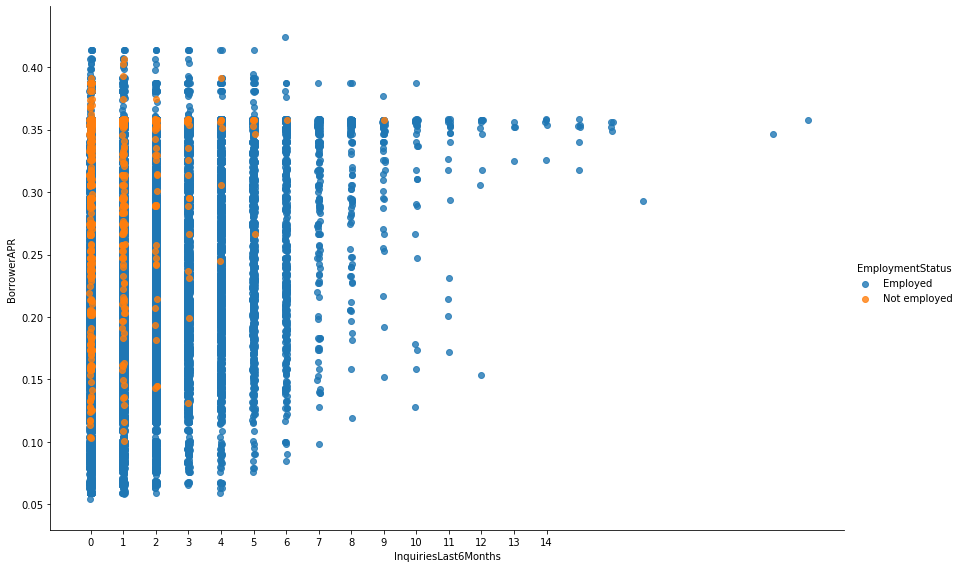

In [236]:
# Use seaborn FacetGrid to facet bivariate plots (InquiriesLast6Months versus BorrowerAPR ) by the level of EmploymentStatus (Employed,Not employed) 
# Pick a dataframe that only include 'Employed' and 'Not employed' EmploymentStatus
df_emp=df_sub_clean.query('EmploymentStatus=="Employed" or EmploymentStatus=="Not employed"')
g=sb.FacetGrid(data=df_emp,hue='EmploymentStatus', hue_order=['Employed','Not employed'], size=8, aspect=1.5)
g=g.map(sb.regplot, 'InquiriesLast6Months', 'BorrowerAPR', x_jitter=0.04, fit_reg=False );
g.add_legend();
xticks=np.arange(0,15,1)
plt.xticks(xticks);

*Not employed* people have fewer inqiries with higher APRs compared to *Employed* ones. *Employed* people are scattered in both inqiries and APRs. 

#### BorrowerAPR versus CreditScoreRangeLower for Completed and Defaulted loans:

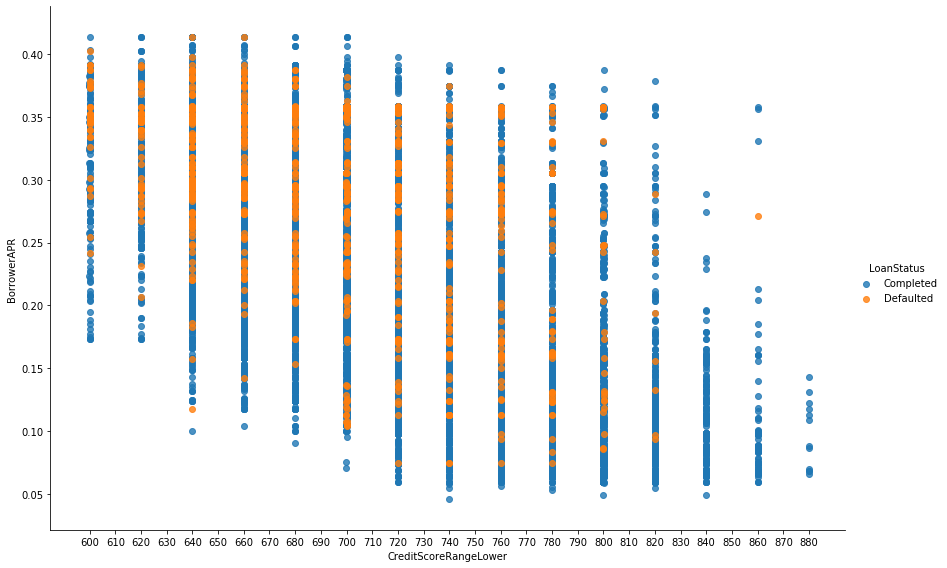

In [237]:
# Use seaborn FacetGrid to facet bivariate plots (CreditScoreRangeLower versus BorrowerAPR ) by the level of LoanStatus (Completed,Defaulted) 
g=sb.FacetGrid(data=df_stu,hue='LoanStatus', hue_order=['Completed','Defaulted'], size=8, aspect=1.5)
g=g.map(sb.regplot, 'CreditScoreRangeLower', 'BorrowerAPR', x_jitter=0.04, fit_reg=False );
g.add_legend();
xticks=np.arange(600,880+10,10)
plt.xticks(xticks);

CreditScoreRangeLower is spread out for both *Completed* and *Defaulted* loans. Most *Defaulted* loans have higher APR and less CreditScoreRangeLower compared to *Completed*. As seen, both *Completed* and *Defaulted* loans with less CreditScoreRangeLower have higher APRs. By increasing CreditScoreRangeLower, their APRs reduced.   

#### BorrowerAPR versus CreditScoreRangeLower for Employed and Not employed people:

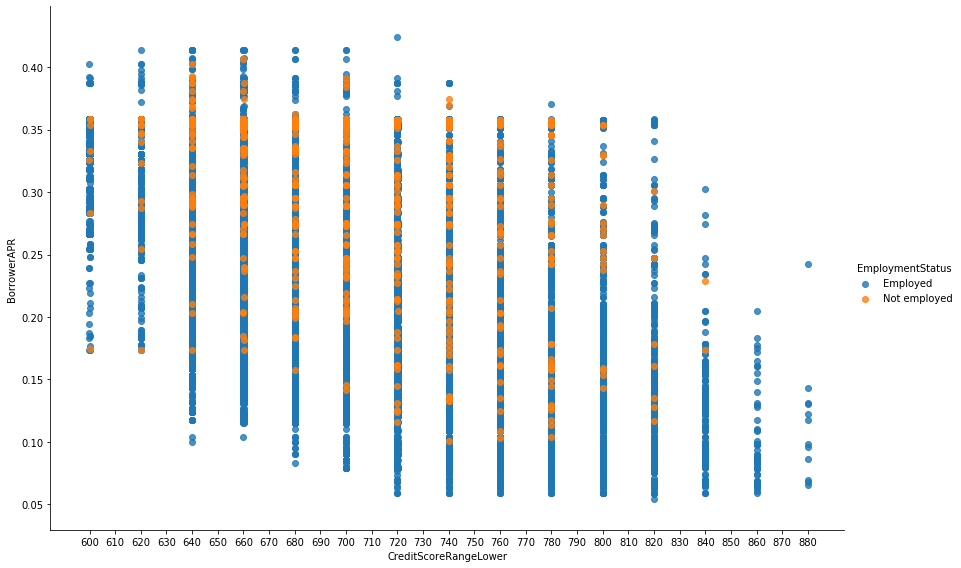

In [238]:
# Use seaborn FacetGrid to facet bivariate plots (CreditScoreRangeLower versus BorrowerAPR ) by the level of EmploymentStatus (Employed,Not employed) 
g=sb.FacetGrid(data=df_emp,hue='EmploymentStatus', hue_order=['Employed','Not employed'], size=8, aspect=1.5)
g=g.map(sb.regplot, 'CreditScoreRangeLower', 'BorrowerAPR', x_jitter=0.04, fit_reg=False );
g.add_legend();
xticks=np.arange(600,880+10,10)
plt.xticks(xticks);

CreditScoreRangeLower is more scattered for *Employed* people. Most *Not employed* people have higher APR  and less CreditScoreRangeLower compared to *Employed* people. Also, for most *Not employed* people, their APR did not reduce by increasing their CreditScoreRangeLower.

#### ProsperRating (numeric) versus LoanStatus in different Term of loans:

C:\maryam\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


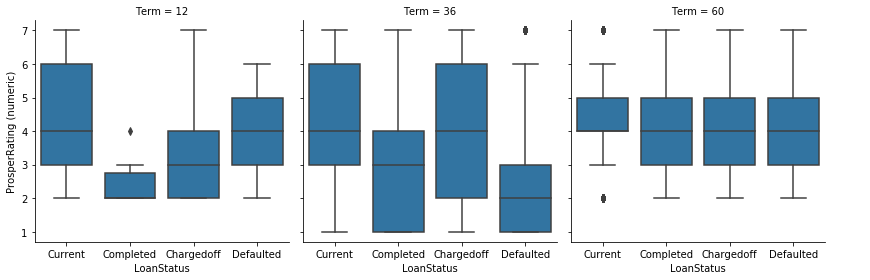

In [239]:
# Use seaborn FacetGrid to facet bivariate plots (LoanStatus versus ProsperRating (numeric) ) by the level of Term
base_color = sb.color_palette()[0]
k = sb.FacetGrid(data = df_status, col = 'Term', size = 4,
                margin_titles = True)
k.map(sb.boxplot,'LoanStatus','ProsperRating (numeric)', color = base_color);
k.add_legend();

 In 12-month-term loans, the *Current* and *Defaulted* loans have a higher prosper-rating. Also, the *Current* loan is more scattered in the prosper-rating compared to the others. The *Completed* loan has prosper-rating which ranges between 2 and 3. 

In 36-month-term loans, the *Current* and *Chargedoff* loans have a higher prosper-rating. All have a wider distribution compared to the other Terms (12 and 60).

In 60-month-term loans, as seen, the distribution of prosper-rating is the same for the *Completed*, *Charged off*, and *Defaulted* loans.    

#### ProsperRating (numeric) versus EmploymentStatus in different Term of loans:

C:\maryam\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\maryam\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


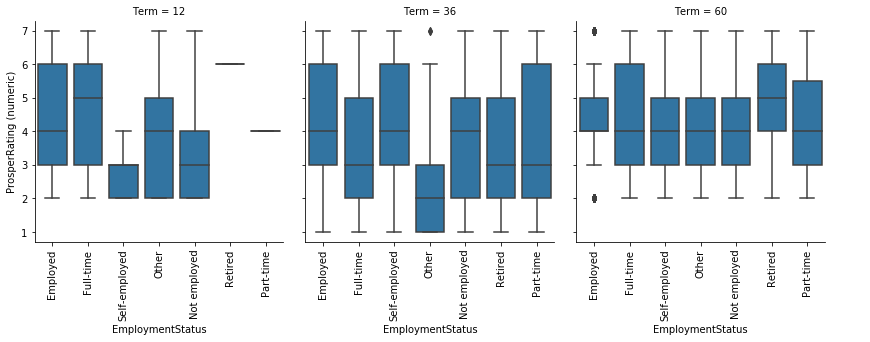

In [240]:
# Use seaborn FacetGrid to facet bivariate plots (EmploymentStatus versus ProsperRating (numeric) ) by the level of Term
base_color = sb.color_palette()[0]
k = sb.FacetGrid(data = df_status, col = 'Term', size = 4,
                margin_titles = True)
k.map(sb.boxplot,'EmploymentStatus','ProsperRating (numeric)', color = base_color);
k.set_xticklabels(rotation=90)
k.add_legend();

 In 12-month-term loans, *Full-time* people have higher prosper-rating. The *Self-employed* people have prosper-rating which ranges between 2 and 3. 

 In 36-month-term loans, the *Other* has less prosper-rating, and the *Employed*, *Self-employed* and *Not employed* people have a high one (the distribution of prosper-rating for the *Employed* and *Self-employed* is right-skewed and for *Not employed*, it is left-skewed).

 In 60-month-term loans, the highest prosper-rating belongs to the *Retired* people. 

#### Looking at the IncomeRange for different loan status across the loan terms:

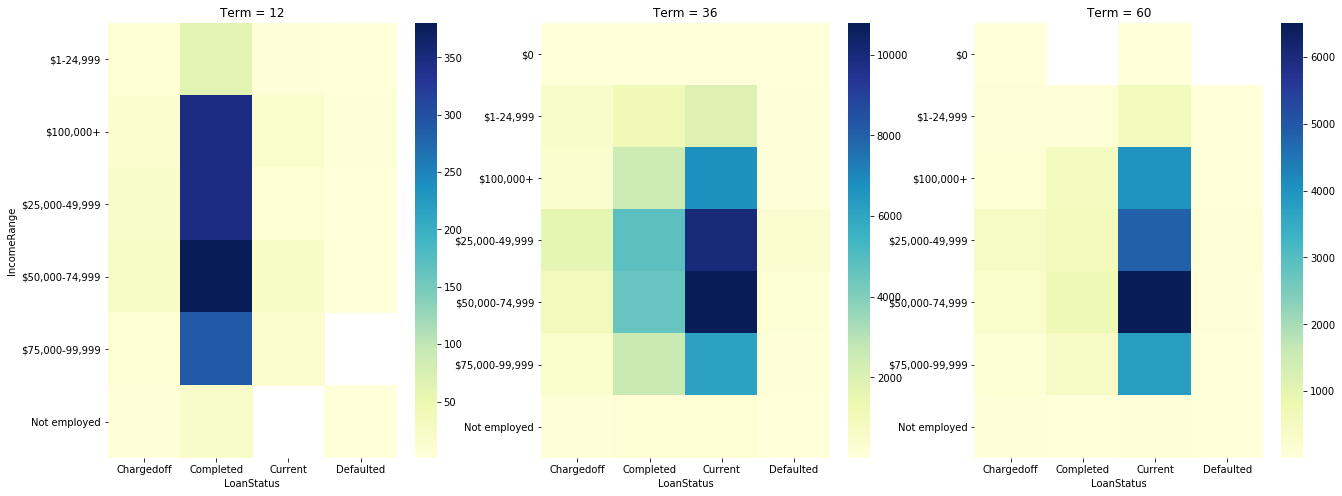

In [241]:
# https://stackoverflow.com/questions/27037241/changing-the-rotation-of-tick-labels-in-seaborn-heatmap

plt.figure(figsize=(22,8))

# First plot
plt.subplot(1, 3, 1)
df_1=df_status.query('Term==12').groupby(['IncomeRange', 'LoanStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('IncomeRange', 'LoanStatus', 'ListingKey')
sb.heatmap(df_1, cmap="YlGnBu");

# Use the plt.yticks function to set rotation=0
plt.yticks(rotation=0);
plt.title("Term = 12", y=1.015)
plt.xlabel('LoanStatus')
plt.ylabel( 'IncomeRange');

# Second plot
plt.subplot(1, 3, 2)
df_1=df_status.query('Term==36').groupby(['IncomeRange', 'LoanStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('IncomeRange', 'LoanStatus', 'ListingKey')
sb.heatmap(df_1, cmap="YlGnBu");
plt.title("Term = 36", y=1.015)
plt.xlabel('LoanStatus')
plt.ylabel( '');

# Third plot
plt.subplot(1, 3, 3)
df_1=df_status.query('Term==60').groupby(['IncomeRange', 'LoanStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('IncomeRange', 'LoanStatus', 'ListingKey')
sb.heatmap(df_1, cmap="YlGnBu");
plt.title("Term = 60", y=1.015)
plt.xlabel('LoanStatus')
plt.ylabel( '');

Most loans with term 12 are *Completed* that have income range of *50,000-74,999* dollars. Then, *100,000+*, *25,000-49,999*,  and *75,000-99,999* dollars, respectively.

Most loans with term 36 and 60 are *Current* with income range of *50,000-74,999*, and then *25,000-49,999* dollars.

In loans with term 36, after the *Current*, the most is *Completed* loan with income ranges of *25,000-49,999* and *50,000-74,999* dollars.

#### Looking at the IncomeRange for different employment status in loan terms:

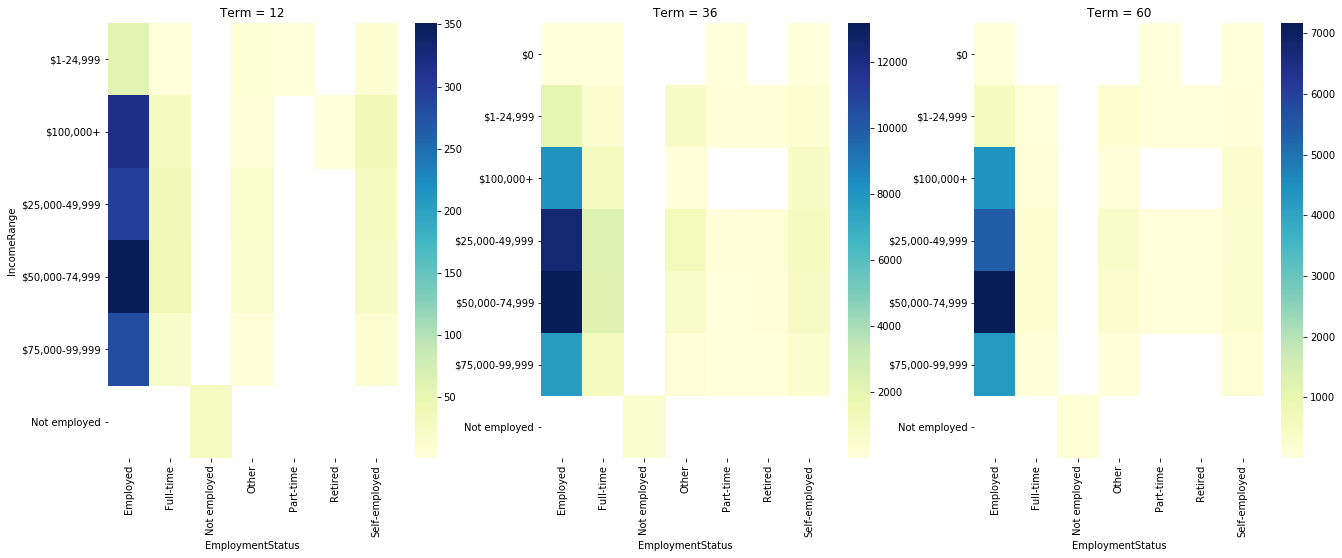

In [242]:
plt.figure(figsize=(22,8))

# First plot
plt.subplot(1, 3, 1)
df_1=df_sub_clean.query('Term==12').groupby(['IncomeRange', 'EmploymentStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('IncomeRange', 'EmploymentStatus', 'ListingKey')
sb.heatmap(df_1, cmap="YlGnBu");
plt.yticks(rotation=0);
plt.title("Term = 12", y=1.015)
plt.xlabel('EmploymentStatus')
plt.ylabel( 'IncomeRange');

# Second plot
plt.subplot(1, 3, 2)
df_1=df_sub_clean.query('Term==36').groupby(['IncomeRange', 'EmploymentStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('IncomeRange', 'EmploymentStatus', 'ListingKey')
sb.heatmap(df_1, cmap="YlGnBu");
plt.title("Term = 36", y=1.015)
plt.xlabel('EmploymentStatus')
plt.ylabel( '');

# Third plot
plt.subplot(1, 3, 3)
df_1=df_sub_clean.query('Term==60').groupby(['IncomeRange', 'EmploymentStatus'])['ListingKey'].size().reset_index()
df_1 = df_1.pivot('IncomeRange', 'EmploymentStatus', 'ListingKey')
sb.heatmap(df_1, cmap="YlGnBu");
plt.title("Term = 60", y=1.015)
plt.xlabel('EmploymentStatus')
plt.ylabel( '');

The graphs for all 12, 36 and 60 terms illustrated that most *employed* people by income range of *50,000-74,999* dollars applied for loans.
Also, most *employed* people by income range of *100,000+* dollars applied for a 12-month-term loan. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The average of borrower APRs for loan status from 2009 through 2014 shows the highest APRs belong to *Chargedoff* across the years. The *Current* had the lowest APR in 2010, and for the rest of them, it was in 2009. The highest APRs was in 2011 for all loan status. After 2011, the amount of APR had reduced for all. Before 2010, there is no *Current* status.

- In 12-month-term loans, the *Current* and *Defaulted* have a higher prosper-rating. Also, the *Current* is more spread out compared to the others. The *Completed* has a prosper-rating between 2 and 3. Generally, most loan status is *Completed* with an income range of 50,000-74,999 dollars, then 100,000+, 25,000-49,999, and 75,000-99,999 dollars, respectively, which applied loan for Debt Consolidation, Other, Home Improvement, Business, Auto, and Household Expenses.

- In 36-month-term loans, the *Current* and *Chargedoff* have a higher prosper-rating. Also, all have a wider distribution compared to the other Terms. Most loan status is *Current* with income ranges of  50,000-74,999, and then 25,000-49,999 dollars. After the *Current*, the most is *Completed* with income ranges of 25,000-49,999 and 50,000-74,999 dollars. Most *Current* and then *Completed* status applied loan for Debt Consolidation and Other.

- In 60-month-term loans, the *Completed*, *Charged off*, and *Defaulted* loans have the same distribution in prosper-rating. Most loan status is *Current* with income ranges of 50,000-74,999, and then 25,000-49,999 dollars, which applied loan for Debt Consolidation.

- The graph of APR versus InquiriesLast6Months for *Completed* and *Defaulted* loan status shows *Defaulted* has fewer inquiries with higher APRs and *Completed* is more scattered. The graph of APR versus CreditScoreRangLower for *Completed* and *Defaulted* loan status displays APR and CreditScoreRangeLower are spread out for both. Most *Defaulted* has higher APR and less CreditScoreRangeLower compared to *Completed* one. Both with less CreditScoreRangeLower have higher APRs. By increasing CreditScoreRangeLower, their APRs reduced.

- The average of borrower APRs for employment status from 2009 through 2014 represents *Full-time* and *Retired* people had the lowest APR during the years. APR had been reducing from 2009 through 2014 for *Employed* and *Other* people and increasing for *Not employed* ones. The highest APR was in 2013 for *Not employed*. There is no *other* before 2010. 

- In 12-month-term loans, *Full-time* people have a higher prosper-rating. The *Self-employed* people have prosper-rating range between 2 and 3. Most *employed* people by income ranges of 50,000-74,999 and 100,000+ dollars applied to Debt Consolidation and Business loans.

- In 36-month-term loans, the *Other* people have lower prosper-rating. The *Employed*, *Self-employed* and *Not employed* people have a high one (the distribution for the *Employed* and *Self-employed* is right-skewed and for *Not employed*, it is left-skewed). Most *employed* people with an income range of 50,000-74,999 dollars applied to loan for Debt Consolidation.

- In 60-month-term loans, the highest prosper-rating belongs to the *Retired* people. Most *Employed* people with an income range of 50,000-74,999 dollars applied to loan for Debt Consolidation.

- The graph of APR versus InquiriesLast6Months for *Employed* and *Not employed* people illustrates that *Not employed* people have fewer inquiries with higher APRs compared to *Employed* ones. *Employed* people are spread out in both.

- The graph of APR versus CreditScoreRangeLower for *Employed* and *Not employed* people displays CreditScoreRangeLower is more scattered for *Employed* people. Most *Not employed* people have higher APR and less CreditScoreRangeLower compared to *Employed* ones. Also, for most *Not employed* people, their APR did not reduce by increasing their CreditScoreRangeLower.

### Were there any interesting or surprising interactions between features?

- It seems that fewer inquiries do not have a strong influence on reducing the amount of APR.
- BorrowerAPR has a moderate negative correlation with 'CreditScoreRangeLower', but in 'BorrowerAPR versus CreditScoreRangeLower for Employed and Not employed people' graph, for most *Not employed* people, their APR did not reduce by increasing their CreditScoreRangeLower.